<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/Lecture02_solving_nonLinear_Equations_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving non-linear equations - Part 1**

&nbsp;

Lecturer: **Hamidreza Norouzi**

&nbsp;

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document are either original or have been obtained from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).
* Amos Gilat and Vish Subramanian, Numerical Methods for Engineers and Scientists, 3rd edition, Wiley (2014).

<div align="center">
🟥 🟥 🟥
</dive>

---



# 🔵 1) Some applications in chemical engineering


## 1-1) Determining Molar Volume using Equation of State (EOS)

* Resolving equations of state (EOS) to ascertain the molar volume of vapor and/or liquid (compressibility factor).

* The Peng-Robinson EOS is taken into consideration:

$$
P = \frac{RT}{v-b}-\frac{aα}{v^2+2bv-b^2} \tag{1-1}
$$
* This equation can be re-arranged to give $Z=\frac{Pv}{RT}$ with known T and P:
$$
Z^3 - (1-B)Z^2 + (A-2B-3B^2)Z - (AB-B^2-B^3)=0  \\
A = \frac{\alpha aP}{R^2T^2} \\
B = \frac{bP}{RT}
\tag{1-2}
$$




<div align="center">
<img src="https://drive.google.com/uc?id=12zuK6cvE-XoGXIX0feBcWikY_ieIQAJz" width="400" />
</div>


## 1-2) Finding friction factor in pipes

* In the hydraulic calculations in the field of chemical engineering, a common challenge arises in the form of estimating the friction factor denoted as *f*.
* This parameter is typically derived using a correlation. Subsequently, it is employed to compute the pressure drop experienced within a pipeline using the formula:
$$
ΔP = f\frac{L}{D}(\frac{1}{2}ρV^2) \tag{1-3}
$$
  - V is the fluid velocity
  - $\rho$ is the fluid density
  - L is the pipe length
  - D is the pipe diameter
* Provided with the Reynolds number (*Re*) and the ratio of roughness to diameter ($\epsilon/D$), the friction factor can be derived using the Colebrook equation:
$$
\frac{1}{\sqrt{f}}= -2log(\frac{ϵ}{3.7D}+\frac{2.51}{Re \sqrt{f}}) \tag{1-4}
$$
&nbsp;



<div align="center">
<img src="https://drive.google.com/uc?id=1c6XNwEiG8lvYKIsF-d4akCQ_qsIP_qY9" width="500" />
</div>

## 1-3) Vapor-Liquid equilibrium in multi-component system

* In the context of a multicomponet mixtures, the Rachford-Rice equation is used to determine the equilibrium composition of the liquid and vapor phases in a flash drum.


<table width="100%">
<tr>
<td width = "65%">

* **Rachford-Rice Equation**:

$$ \sum \frac{z_i \cdot (K_i - 1)}{1 + \beta \cdot (K_i - 1)}=0$$
- $N$ is the component count (2 for ethanol and water).
- $z_i$ is the mole fraction of component $i$ in the liquid.
- $K_i$ is the equilibrium constant for component $i$.
- $\beta$ is the vapor phase fraction.

</td>
<td>
<img src = "https://drive.google.com/uc?id=1awu_PkCXKcdp7UX4SJWb6tX7MUGSHdZr" width ="250">
</td>
</tr>
</table>


* Using the Rachford-Rice equation, the vaporization fraction $\beta$ is calculated. Solving for $\beta$ involves numerical methods due to its non-linear nature.
* Once $\beta$ is found, it's utilized to determine component mole fractions in the vapor and liquid phases:
 - Mole fraction in liquid phase ($x_i$) = $\frac{z_i}{1 + \beta \cdot (K_i - 1)}$
 - Mole fraction in vapor phase ($y_i$) = $(K_i. x_i )$

<div align="center">
🟦 🟦 🟦
</div>


---



# 🟡 2) Graphical Method
* The most straightforward approach to determining the solutions of an equation is to graph it in the range of interest, thereby approximating the equation's roots.
* Creating a plot of an equation (if feasible) helps identifying the interval within which a root exists and counting the number of roots.

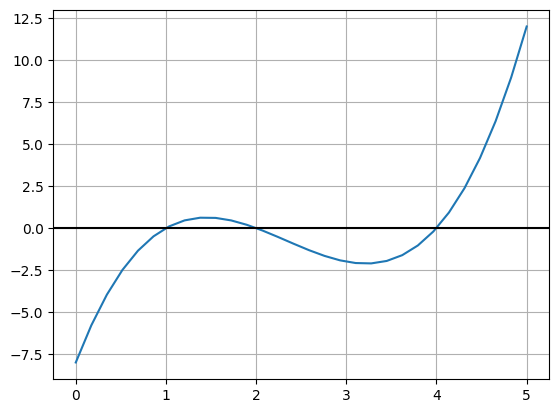

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(start=0, stop=5, num =30)
y = pow(x,3)-  7*pow(x,2) + 14*x - 8
plt.plot(x,y)
plt.grid()
plt.axhline(y=0, c='k')

<div align="center">
🟨 🟨 🟨
</div>


---



# 🔴 3) Finding intervals containing root
* This method relies on a fundamental characteristic of functions near their roots: the **change of sign**.
* Given a continuous function *f(x)* with a single root within the interval [a, b], the following relationship holds:
$$
f(a)f(b) < 0 \tag{3-1}
$$
* The interval [a, b] is subdivided into n sub-intervals, and the potential presence of a root within each of these sub-intervals is examined.

number of intervals is  9


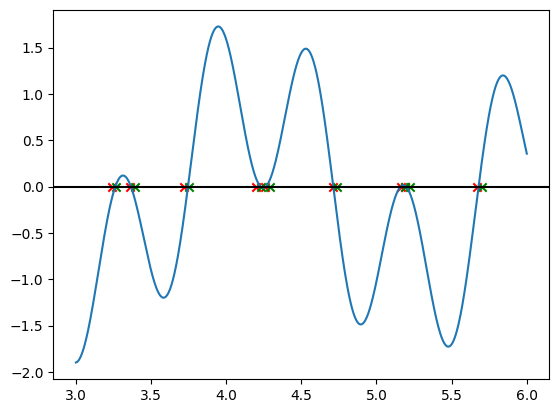

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def findRootInterval(fx, xmin, xmax, n=10):
  h = (xmax - xmin)/n
  xs = xmin;
  fxs = fx(xs)
  intervals = []
  for i in range(n):
    xe = xs + h
    fxe = fx(xe)
    if fxs*fxe <= 0:
      intervals.append([xs, xe])
    xs = xe
    fxs = fxe
  return intervals

def fx(x):
  return math.sin(10*x)+math.cos(3*x)

xmin = 3
xmax = 6
n = 100

x = np.linspace(xmin,xmax, 10*n)
y = [fx(xi) for xi in x]

plt.plot(x,y)

intervals = findRootInterval(fx, xmin, xmax , n)
intervals_arr = np.asarray(intervals);
nInterval = len(intervals)
y0 = np.zeros(nInterval)



plt.scatter(intervals_arr[:,0],y0, marker='x',c='r')
plt.scatter(intervals_arr[:,1],y0, marker='x',c='g')

plt.axhline(y=0, c='k')

print("number of intervals is ", nInterval)

<div align="center">
🟥 🟥 🟥
</div>


---



# 🟢 4) Bisection method
* Given a continuous function $f(x): \mathbb{R} \rightarrow \mathbb{R}$ and two real numbers, $a$ and $b$, such that $f(a)f(b)<0$, the function must have at least one root within this interval.
* This method relies on having [a, b], then bisecting the interval into two equal sub-intervals. The sub-interval where the sign of $f(x)$ changes is retained, and the process is reiterated iteratively until a specified threshold/tolerance.

<div align="center">
<img src="https://drive.google.com/uc?id=1zukhCuUcB1rpVAa_ZCOfTDKm-eR53WU2" width="800"/>
</div>

## 4-1) Algorithm
* The algorithm for bisection method can be something as follows:

1.   Get a, b, tol
2.   Check if f(a)f(b) > 0
 *   **True**: no root can be found
3. x_mid = (a+b)/2
4. if abs(f(x_mid))<tol
 * root is x_mid, report
5. if f(a)f(x_mid) < 0
 * **True**: b = x_mid
 * **False**: a = x_mid
6. Calculate approximate error
 * err = abs((x_mid - x_mid_0)/x_mid)
 * Fix the program for x_mid near zero
7. if err < tol
 * **True**: root is x_mid, report
 * **False**: go to 3




## 4-2) Code for bisection method

* You can find the bisection method code in [matlab here](https://github.com/hamidrezanorouzi/numericalMethods/blob/main/matlab/bisection.m) or in [python here](https://github.com/hamidrezanorouzi/numericalMethods/blob/main/python/Root/bisection.py).  

In [3]:
import math

def bisection(f, a, b, tol=0.001, maxIter=100):
  """
  Find a root of a function within a given interval using the bisection method.

  Parameters:
  f (function): The function for which a root needs to be found.
  a (float): Left endpoint of the interval.
  b (float): Right endpoint of the interval.
  tol (float): Tolerance for stopping iteration (default is 0.001).
  maxIter (int): Maximum number of iterations (default is 100).

  Returns:
  tuple: A tuple containing the estimated root, approximate relative
          error, and number of iterations. If no root is found within
          the maximum iterations, returns None.
  """
  fa = f(a)
  fb = f(b)
  x_mid_0 = a
  found_root = False  # Flag to indicate if a valid root has been found

  # Check if the function crosses the x-axis within the interval
  if fa * fb > 0:
    print(f'No root can be found in interval [{a},{b}]')
    return None

  for iter in range(maxIter):
    x_mid = (a + b) / 2
    fx_mid = f(x_mid)

    if fa * fx_mid < 0:
      b = x_mid
      fb = fx_mid
    else:
      a = x_mid
      fa = fx_mid

    if abs(x_mid) > 1.0e-15:
      ea = abs((x_mid - x_mid_0) / x_mid)
    else:
      ea = abs(x_mid)

    x_mid_0 = x_mid

    # Check if either the function value or the relative error is within tolerance
    if abs(fx_mid) < tol or ea < tol:
      found_root = True
      break

  if found_root:
    return x_mid, ea, iter + 1
  else:
    print(f'No root can be found in interval [{a},{b}]'
          f' after {maxIter} iterations')
    return None


In [4]:
def fx(x):
  return x*math.sin(2*x)

intervals = findRootInterval(fx, 0.1, 7 , 10)
print(intervals)
for interval in intervals:
  root = bisection(fx, interval[0], interval[1], tol = 1.0e-5 )
  print(root)

[[1.48, 2.17], [2.86, 3.55], [4.24, 4.930000000000001], [5.620000000000001, 6.310000000000001]]
(1.57079833984375, 0.00010724293945119589, 12)
(3.1415969848632814, 6.702683064625311e-06, 15)
(4.712395629882813, 8.93691046345559e-06, 14)
(6.283173217773438, 6.702705202128121e-06, 14)


### ❓ **Example 1:**
Find the root of function $f(x) = 8-4.5(x-sin(x))$ in the interval [2,3] with tol = 0.5 % using bisection method.

💡 *Solution*

We start we a = 2 and b = 3 and narrowing the interval based on the bisection method.

| Iteration  | a | b  | $x_{mid}$ | f(a) | f(b) | f($x_{mid}$)| error %
| :---  |    :----:   | :---: | :---: |:---: |:---: |:---: |:---: |
| 1     | 2.0000      | 3.0000   | **2.5000**|3.0918 |-4.8650 |-0.55688| N.A.|
| 2     | 2.0000      | 2.5000   | **2.2500**|3.0918 |-0.55688|1.3763 | 11.11|
| 3     | 2.2500      | 2.5000   | **2.3750**|1.3763 |-0.55688| 0.43408| 5.26%|
| 4     | 2.3750      | 2.5000   | **2.4375**|0.43408|-0.55688|-0.055709| 2.56%|
| 5     | 2.3750      | 2.4375   | **2.4063**|0.43408|-0.055709|0.19066| 1.30%|
| 6     | 2.4063      | 2.4375   | **2.4219**|0.19066|-0.055709|0.067641| 0.64%|
| 7     | 2.4219      | 2.4375   | **2.4297**|0.067641|-0.055709|0.0060556| 0.32%|

Testing the solution using the code.

In [5]:
import math
def exp1Dx(x):
  return 8-4.5*(x-math.sin(x))

print(bisection(exp1Dx, 2,3, tol = 0.005 ))

(2.4296875, 0.003215434083601286, 7)


## 4-3) Properties of bisection method
* The method always converges to an answer, provided a root exists
in the interval [a, b].
* The method may fail when the function is tangent to the axis and
does not cross the x-axis at $f(x) = 0$.
* The method **converges slowly** relative to other methods.
* Let $x^*$ be the true value of the root in [a,b].  Let $a_n$, $b_n$ and $x_n$ be the values of a, b and $x_{mid}$ on the $n^{th}$ iteration of the algorithm. The error is bounded by:

$$
E_t= |x^*-x_n| \leq \frac{b-a}{2^n}  \tag{3-2}
$$

* The number of iterations to obtain the answer with a certain error is obtained by:
$$
n \geq \frac{ln(\frac{b-a}{E_t})}{ln2} \tag{3-3}
$$


<div align="center">
🟩 🟩 🟩
</div>


---



# 🟣 5) False position method
* It is similar to bisection method, except that it uses a line connecting the end points of the interval to find the new estimate of the root.
* The equation of the line is:
$$
y = \frac{f(b)-f(a)}{b-a}(x-b)+f(b) \tag{5-1}
$$
* The point x_i where the line intersects the x-axis is obtained by:
$$
x_i = \frac{af(b)-bf(a)}{f(b)-f(a)} \tag{5-2}
$$



<div align="center">
<img src="https://drive.google.com/uc?id=1Dt9XW3K5XtyrGT4Cw-9aFDH9C97r_dp0" width = "800">
</div>

## 5-1) Code for false position method

In [6]:
import math

def falsePosition(f, a, b, tol=0.001, maxIter=100):
  """
  Find a root of a function within a given interval using the false position method.

  Parameters:
  f (function): The function for which a root needs to be found.
  a (float): Left endpoint of the interval.
  b (float): Right endpoint of the interval.
  tol (float): Tolerance for stopping iteration (default is 0.001).
  maxIter (int): Maximum number of iterations (default is 100).

  Returns:
  tuple: A tuple containing the estimated root, approximate relative
          error, and number of iterations. If no root is found, returns None.
  """
  fa = f(a)
  fb = f(b)
  x_i_0 = a

  # Check if the function crosses the x-axis within the interval
  if fa * fb > 0:
    print(f'No root can be found in interval [{a},{b}]')
    return None

  for iter in range(maxIter):
    x_i = (a * fb - b * fa) / (fb - fa)
    fx_i = f(x_i)

    if fa * fx_i < 0:
      b = x_i
      fb = fx_i
    else:
      a = x_i
      fa = fx_i

    if abs(x_i) > 1.0e-15:
      ea = abs((x_i - x_i_0) / x_i)
    else:
      ea = abs(x_i)

    x_i_0 = x_i

    # Check if either the function value or the relative error
    # is within tolerance
    if abs(fx_i) < tol or ea < tol:
      return x_i, ea, iter + 1

  print(f'No root can be found in interval [{a},{b}]'
        f' after {maxIter} iterations')
  return None

In [7]:
def fx(x):
  return x * math.sin(2 * x)

intervals = findRootInterval(fx, 0.1, 7 , 10)
print(intervals)
for interval in intervals:
  root = falsePosition(fx, interval[0], interval[1], tol = 1.0e-5 )
  print(root)

[[1.48, 2.17], [2.86, 3.55], [4.24, 4.930000000000001], [5.620000000000001, 6.310000000000001]]
(1.5707960818593842, 2.114485865587743e-06, 5)
(3.141592624481785, 1.0934580176434044e-06, 4)
(4.7123888320294345, 2.338223561307116e-06, 4)
(6.283185102594846, 8.597175880023444e-06, 3)


### ❓ **Example 2:**
Find the root of function $f(x) = 8-4.5(x-sin(x))$ in the interval [2,3] with tol = 0.5 % usign false position method.

💡 *Solution*

We start we a = 2 and b = 3 and narrowing the interval based on the bisection method.

| Iteration  | a | b  | $x_{mid}$ | f(a) | f(b) | f($x_{mid}$)| error %
| :---  |    :----:   | :---: | :---: |:---: |:---: |:---: |:---: |
|1  | 2.0000 | 3.0000 | **2.3886**| 3.0918  | -4.8650| 0.32851| N.A.|
|2  | 2.3886 | 3.0000 | **2.4273**| 0.32851 | -4.8650| 0.025228|1.59|
|3  | 2.4273 | 3.0000 | **2.4302**| 0.025228| -4.8650| 0.0018585|0.12|

In [8]:
import math
def exp1Dx(x):
  return 8-4.5*(x-math.sin(x))

print(exp1Dx(3))
print(math.sin(2))
print(falsePosition(exp1Dx, 2,3, tol = 0.005 ))

-4.8649599637305965
0.9092974268256817
(2.430228705704582, 0.0012164213478575365, 3)


## 5-2) Properties of false position method
* The method ensures convergence to a solution if a root exists within the range [a, b].
* Failure of the method can occur when the function is tangent to the axis and does not intersect the x-axis at $f(x) = 0$.
* Its convergence rate surpasses that of the bisection method.
* **A notable drawback**: During the iterative process, one of the bracketing points tends to remain constant. This drawback can result in slow convergence, especially for functions with substantial curvature.

## 5-3) Does false position always converge faster than bisection?
* Lest consider the function $f(x) = x^{10}-1$ which has a root at $x=1$. And we are going to find its root in interval [0, 1.3]. Both bisection and false position methods are used.


Bisection method:  (1.0000038146972656, 9.918175055922961e-06, 17)
False-position method:  (0.9999719210572239, 8.607462032226427e-06, 48)


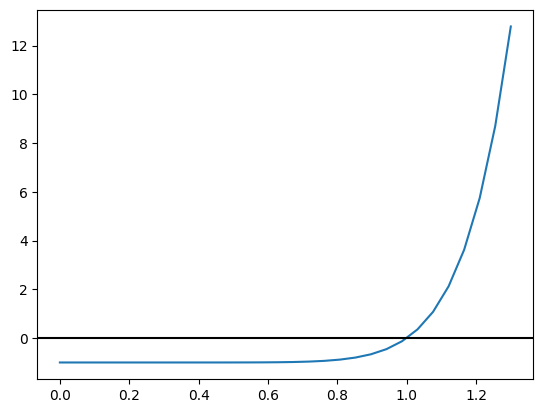

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def fx53(x):
  return pow(x,10)-1;

x = np.linspace(0,1.3,30)
y = [fx53(xi) for xi in x]

plt.plot(x,y)
plt.axhline(y=0, color='k')

print("Bisection method: ",bisection(fx53,0, 1.3, tol=0.00001))
print("False-position method: ",falsePosition(fx53,0, 1.3, tol=0.00001))

<div align="center">
🟪 🟪 🟪
</div>


---



# 🟤 6) More problems to solve

## 6-1) Problem 1
The saturation concentration of dissolved oxygen in freshwater can be calculated with the equation:
$$
lnO_{sf}=-139.34411 + \frac{1.575701 ×10^5}{T_a} - \frac{6.642308\times10^7}{T^{2}_{a}}+\frac{1.243800×10^{10}}{T^{3}_{a}}-\frac{8.621949×10^{11}}{T^{4}_{a}}
$$
* $O_{sf}$ : the saturation concentration of oxygen in mg/L
* $T_a$: absolute temperature in K

This equation can be used to estimate the oxygen concentration between 0 °C (14.621 mg/L) and 35 °C (6.949 mg/L). Determine the temperature at the following cases:

1. oxygen concentration is 8 mg/L, using bisection method. Take tol = 0.1%.
2. oxygen concentration is 12 mg/L, using false position method. Take tol = 0.1%.


In [10]:
def calculate_lnO_sf(Ta):
  global oxygenConentration
  term1 = -139.34411
  term2 = (1.575701e5) / Ta
  term3 = (6.642308e7) / (Ta**2)
  term4 = (1.243800e10) / (Ta**3)
  term5 = (8.621949e11) / (Ta**4)

  return term1 + term2 - term3 + term4 - term5 - math.log(oxygenConentration)

oxygenConentration = 10
print(calculate_lnO_sf(300))

falsePosition(calculate_lnO_sf, 273, 273+35.0, 0.001)


-0.22439879669772278


(288.58213774406653, 0.0009944937851783834, 3)

## 6-2) Problem 2

Solve the equation $x-2e^{-x}=0$ using bisection method with a = 0 and b = 1. Take tol = 0.5%.